# Use Customized Notebook Template (CLAIMS_RESERVE_Template)

### Packages needed to run this notebook if running with inbuilt snowpark 3.8 template
##### !pip install --q "snowflake-connector-python[pandas]"
##### !sudo pip install --q  snowflake-ml-python==1.0.11 -U
##### !pip install --upgrade --q snowflake-snowpark-python==1.9.0
##### !pip install --q seaborn
##### !pip install --q plotly 
##### !pip install --upgrade --q numpy==1.24.3
##### !pip install --upgrade --q pandas==1.5.3
##### !pip install fosforio

In [2]:
from snowflake.snowpark import Session
from snowflake.connector.pandas_tools import write_pandas

# Data Science Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

# create_temp_table warning suppresion
import warnings; warnings.simplefilter('ignore')

In [3]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [4]:
table_name = 'AUTO_INSURANCE_CLAIMS_DATA'
sf_df = my_session.sql("select * from {}".format(table_name))
df = sf_df.to_pandas()

In [5]:
insurance_claim = df.copy()

# Shape of Insurance claims data

In [6]:
insurance_claim.shape

(232025, 41)

# Generic Information of Insurance claims data

In [7]:
insurance_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232025 entries, 0 to 232024
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   MONTHS_AS_CUSTOMER           232025 non-null  int16 
 1   CUSTOMER_AGE                 232025 non-null  int8  
 2   POLICY_NUMBER                232025 non-null  object
 3   POLICY_BIND_DATE             232025 non-null  object
 4   POLICY_STATE                 232025 non-null  object
 5   POLICY_CSL                   232025 non-null  object
 6   POLICY_DEDUCTABLE            232025 non-null  int16 
 7   POLICY_ANNUAL_PREMIUM        232025 non-null  int16 
 8   UMBRELLA_LIMIT               232025 non-null  int32 
 9   INSURED_ZIP                  232025 non-null  object
 10  INSURED_SEX                  232025 non-null  object
 11  INSURED_EDUCATION_LEVEL      232025 non-null  object
 12  INSURED_OCCUPATION           232025 non-null  object
 13  INSURED_HOBBIE

# Description of Insurance claims data

In [8]:
insurance_claim.describe()

,MONTHS_AS_CUSTOMER,CUSTOMER_AGE,POLICY_DEDUCTABLE,POLICY_ANNUAL_PREMIUM,UMBRELLA_LIMIT,CAPITAL_GAINS,CAPITAL_LOSS,NUMBER_OF_VEHICLES_INVOLVED,BODILY_INJURIES,WITNESSES,TOTAL_CLAIM_AMOUNT_PAID,INJURY_CLAIM,PROPERTY_CLAIM,VEHICLE_CLAIM
count,232025.000000,232025.000000,232025.000000,232025.000000,2.320250e+05,232025.000000,232025.00000,232025.000000,232025.000000,232025.000000,232025.000000,232025.000000,232025.000000,232025.000000
mean,126.727736,43.838483,1253.651365,1566.490792,1.040827e+07,47900.608447,-41154.24565,1.475707,0.996712,1.501437,67235.224006,7735.964607,8529.807297,50969.452102
std,91.088378,14.691610,535.036140,656.380264,5.916215e+06,27700.863866,23731.03404,0.701444,0.817630,1.115730,18857.753110,7150.694660,7865.621423,15683.462801
min,7.000000,19.000000,301.000000,430.000000,0.000000e+00,0.000000,-90200.00000,1.000000,0.000000,0.000000,21214.000000,300.000000,0.000000,20004.000000
25%,43.000000,31.000000,793.000000,996.000000,6.166324e+06,23826.000000,-61635.00000,1.000000,0.000000,1.000000,53423.000000,524.000000,1024.000000,37614.000000
50%,111.000000,44.000000,1250.000000,1569.000000,1.075463e+07,48076.000000,-41330.00000,1.000000,1.000000,2.000000,67742.000000,6062.000000,6209.000000,50927.000000
75%,197.000000,57.000000,1698.000000,2134.000000,1.537261e+07,71699.000000,-20555.00000,2.000000,2.000000,2.000000,81082.000000,14017.000000,15316.000000,64362.000000
max,326.000000,69.000000,2430.000000,2700.000000,1.999986e+07,96000.000000,0.00000,4.000000,2.000000,3.000000,121412.000000,21899.000000,26432.000000,81998.000000


In [9]:
insurance_claim.describe(include='O')

,POLICY_NUMBER,POLICY_BIND_DATE,POLICY_STATE,POLICY_CSL,INSURED_ZIP,INSURED_SEX,INSURED_EDUCATION_LEVEL,INSURED_OCCUPATION,INSURED_HOBBIES,INSURED_RELATIONSHIP,...,INCIDENT_LOCATION,INCIDENT_HOUR_OF_THE_DAY,INCIDENT_TIME_OF_DAY,PROPERTY_DAMAGE,POLICE_REPORT_AVAILABLE,AUTO_MAKE,AUTO_MODEL,AUTO_YEAR,FRAUD_REPORTED,POLICY_BIND_DATE_CUSTOM
count,232025,232025,232025,232025,232025,232025,232025,232025,232025,232025,...,232025,232025,232025,232025,232025,232025,232025,232025,232025,232025
unique,60854,9484,1,3,995,2,7,14,20,6,...,1032,24,4,3,3,14,39,21,2,9484
top,486582,20-02-2010,CT,100/300,431532,MALE,JD,prof-specialty,kayaking,unmarried,...,St,22,Night Time,Property Damage,Police Report Available,Nissan,RAM,1995,No Fraud Reported,2010-02-20
freq,4,67,232025,77817,334,116286,38104,27321,11980,39030,...,13547,15606,103195,132014,100600,19918,7876,12950,197417,67


# Check Null Values

In [13]:
insurance_claim.isnull().sum()

MONTHS_AS_CUSTOMER             0
CUSTOMER_AGE                   0
POLICY_NUMBER                  0
POLICY_BIND_DATE               0
POLICY_STATE                   0
POLICY_CSL                     0
POLICY_DEDUCTABLE              0
POLICY_ANNUAL_PREMIUM          0
UMBRELLA_LIMIT                 0
INSURED_ZIP                    0
INSURED_SEX                    0
INSURED_EDUCATION_LEVEL        0
INSURED_OCCUPATION             0
INSURED_HOBBIES                0
INSURED_RELATIONSHIP           0
CAPITAL_GAINS                  0
CAPITAL_LOSS                   0
INCIDENT_DATE                  0
INCIDENT_TYPE                  0
COLLISION_TYPE                 0
INCIDENT_SEVERITY              0
AUTHORITIES_CONTACTED          0
INCIDENT_STATE                 0
INCIDENT_CITY                  0
INCIDENT_LOCATION              0
INCIDENT_HOUR_OF_THE_DAY       0
INCIDENT_TIME_OF_DAY           0
NUMBER_OF_VEHICLES_INVOLVED    0
PROPERTY_DAMAGE                0
BODILY_INJURIES                0
WITNESSES 

### Visualization 

In [16]:
insurance_claim=insurance_claim.replace("?",np.NaN)
round(100*(insurance_claim.isnull().sum()/len(insurance_claim.index)),2)

MONTHS_AS_CUSTOMER             0.0
CUSTOMER_AGE                   0.0
POLICY_NUMBER                  0.0
POLICY_BIND_DATE               0.0
POLICY_STATE                   0.0
POLICY_CSL                     0.0
POLICY_DEDUCTABLE              0.0
POLICY_ANNUAL_PREMIUM          0.0
UMBRELLA_LIMIT                 0.0
INSURED_ZIP                    0.0
INSURED_SEX                    0.0
INSURED_EDUCATION_LEVEL        0.0
INSURED_OCCUPATION             0.0
INSURED_HOBBIES                0.0
INSURED_RELATIONSHIP           0.0
CAPITAL_GAINS                  0.0
CAPITAL_LOSS                   0.0
INCIDENT_DATE                  0.0
INCIDENT_TYPE                  0.0
COLLISION_TYPE                 0.0
INCIDENT_SEVERITY              0.0
AUTHORITIES_CONTACTED          0.0
INCIDENT_STATE                 0.0
INCIDENT_CITY                  0.0
INCIDENT_LOCATION              0.0
INCIDENT_HOUR_OF_THE_DAY       0.0
INCIDENT_TIME_OF_DAY           0.0
NUMBER_OF_VEHICLES_INVOLVED    0.0
PROPERTY_DAMAGE     

In [17]:
### Checking unique values for collosion type
round(100*(insurance_claim['COLLISION_TYPE'].value_counts(normalize=True,dropna=False)),2)

COLLISION_TYPE
Rear Collision           36.71
Front Collision          24.47
Side Collision           24.41
Details not Available    14.41
Name: proportion, dtype: float64

In [18]:
### We can impute collosion type with mode i.e most occuring collosion type
### imputing

insurance_claim['COLLISION_TYPE']=insurance_claim['COLLISION_TYPE'].fillna(insurance_claim['COLLISION_TYPE'].mode()[0])

In [19]:
### Checking unique values for collosion type

round(100*(insurance_claim['PROPERTY_DAMAGE'].value_counts(normalize=True,dropna=False)),2)

PROPERTY_DAMAGE
Property Damage          56.36
No Property Damage       37.84
Details not Available     5.80
Name: proportion, dtype: float64

In [20]:
### If there was property loss,then the report would have been filed.So,we can consider missing value as "NO"
###Imputing with "NO"

insurance_claim['PROPERTY_DAMAGE']=insurance_claim['PROPERTY_DAMAGE'].fillna("NO")

In [21]:
### Checking unique values for collosion type

round(100*(insurance_claim['POLICE_REPORT_AVAILABLE'].value_counts(normalize=True,dropna=False)),2)

POLICE_REPORT_AVAILABLE
Police Report Available       43.53
No Police Report Available    40.27
Unknown                       16.20
Name: proportion, dtype: float64

In [22]:
### If there was police reported,then the report would have been filed.So,we can consider missing value as "NO"
###Imputing with "NO"

insurance_claim['POLICE_REPORT_AVAILABLE']=insurance_claim['PROPERTY_DAMAGE'].fillna("NO")

In [23]:
### Checking missing value again

round(100*(insurance_claim.isnull().sum()/len(insurance_claim.index)),2)

MONTHS_AS_CUSTOMER             0.0
CUSTOMER_AGE                   0.0
POLICY_NUMBER                  0.0
POLICY_BIND_DATE               0.0
POLICY_STATE                   0.0
POLICY_CSL                     0.0
POLICY_DEDUCTABLE              0.0
POLICY_ANNUAL_PREMIUM          0.0
UMBRELLA_LIMIT                 0.0
INSURED_ZIP                    0.0
INSURED_SEX                    0.0
INSURED_EDUCATION_LEVEL        0.0
INSURED_OCCUPATION             0.0
INSURED_HOBBIES                0.0
INSURED_RELATIONSHIP           0.0
CAPITAL_GAINS                  0.0
CAPITAL_LOSS                   0.0
INCIDENT_DATE                  0.0
INCIDENT_TYPE                  0.0
COLLISION_TYPE                 0.0
INCIDENT_SEVERITY              0.0
AUTHORITIES_CONTACTED          0.0
INCIDENT_STATE                 0.0
INCIDENT_CITY                  0.0
INCIDENT_LOCATION              0.0
INCIDENT_HOUR_OF_THE_DAY       0.0
INCIDENT_TIME_OF_DAY           0.0
NUMBER_OF_VEHICLES_INVOLVED    0.0
PROPERTY_DAMAGE     

In [24]:
### Dropping those column which are not much sighnificance in oir analysis

insurance_claim.drop(["INCIDENT_HOUR_OF_THE_DAY",'INSURED_ZIP','POLICY_BIND_DATE','INCIDENT_LOCATION'],axis=1,inplace=True)

In [25]:
### Checking shape of dataset again

insurance_claim.shape

(234265, 36)

In [26]:
### Checking values for each column

insurance_claim.nunique()

MONTHS_AS_CUSTOMER               323
CUSTOMER_AGE                      51
POLICY_NUMBER                  61441
POLICY_STATE                       1
POLICY_CSL                         3
POLICY_DEDUCTABLE               2121
POLICY_ANNUAL_PREMIUM           2271
UMBRELLA_LIMIT                 53101
INSURED_SEX                        2
INSURED_EDUCATION_LEVEL            7
INSURED_OCCUPATION                14
INSURED_HOBBIES                   20
INSURED_RELATIONSHIP               6
CAPITAL_GAINS                  45174
CAPITAL_LOSS                   42927
INCIDENT_DATE                   1003
INCIDENT_TYPE                      4
COLLISION_TYPE                     4
INCIDENT_SEVERITY                  3
AUTHORITIES_CONTACTED              5
INCIDENT_STATE                     1
INCIDENT_CITY                     10
INCIDENT_TIME_OF_DAY               4
NUMBER_OF_VEHICLES_INVOLVED        4
PROPERTY_DAMAGE                    3
BODILY_INJURIES                    3
WITNESSES                          4
P

In [27]:
### SANITY CHECK - Total claim must be equal to sum of "injury_claim","property_claim","vehicle_claim"

insurance_claim[insurance_claim['TOTAL_CLAIM_AMOUNT_PAID'] != insurance_claim['INJURY_CLAIM']+insurance_claim['PROPERTY_CLAIM']+insurance_claim['VEHICLE_CLAIM']].shape[0]

0

In [28]:
### Others sanity check
print(insurance_claim[insurance_claim['MONTHS_AS_CUSTOMER']<0].shape[0])
print(insurance_claim[insurance_claim['POLICY_DEDUCTABLE']<0].shape[0])
print(insurance_claim[insurance_claim['TOTAL_CLAIM_AMOUNT_PAID']<0].shape[0])
print(insurance_claim[insurance_claim['UMBRELLA_LIMIT']<0].shape[0])
print(insurance_claim[insurance_claim['CAPITAL_GAINS']<0].shape[0])
print(insurance_claim[insurance_claim['NUMBER_OF_VEHICLES_INVOLVED']<0].shape[0])
print(insurance_claim[insurance_claim['INJURY_CLAIM']<0].shape[0])
print(insurance_claim[insurance_claim['PROPERTY_CLAIM']<0].shape[0])
print(insurance_claim[insurance_claim['VEHICLE_CLAIM']<0].shape[0])

0
0
0
0
0
0
0
0
0


In [29]:
### Checking datatypes
insurance_claim.dtypes

MONTHS_AS_CUSTOMER               int16
CUSTOMER_AGE                    object
POLICY_NUMBER                    int32
POLICY_STATE                    object
POLICY_CSL                      object
POLICY_DEDUCTABLE                int16
POLICY_ANNUAL_PREMIUM            int16
UMBRELLA_LIMIT                   int32
INSURED_SEX                     object
INSURED_EDUCATION_LEVEL         object
INSURED_OCCUPATION              object
INSURED_HOBBIES                 object
INSURED_RELATIONSHIP            object
CAPITAL_GAINS                    int32
CAPITAL_LOSS                     int32
INCIDENT_DATE                   object
INCIDENT_TYPE                   object
COLLISION_TYPE                  object
INCIDENT_SEVERITY               object
AUTHORITIES_CONTACTED           object
INCIDENT_STATE                  object
INCIDENT_CITY                   object
INCIDENT_TIME_OF_DAY            object
NUMBER_OF_VEHICLES_INVOLVED       int8
PROPERTY_DAMAGE                 object
BODILY_INJURIES          

In [30]:
### changing Incident date into datetime format
insurance_claim['INCIDENT_DATE']=pd.to_datetime(insurance_claim['INCIDENT_DATE'],format='%Y-%m-%d')

### changing auto_year date into datetime format
insurance_claim['AUTO_YEAR']=pd.to_datetime(insurance_claim['AUTO_YEAR'],format='%Y')

In [31]:
# OUTLIER DETECTION
insurance_claim.describe().columns.to_list()

['MONTHS_AS_CUSTOMER',
 'POLICY_NUMBER',
 'POLICY_DEDUCTABLE',
 'POLICY_ANNUAL_PREMIUM',
 'UMBRELLA_LIMIT',
 'CAPITAL_GAINS',
 'CAPITAL_LOSS',
 'INCIDENT_DATE',
 'NUMBER_OF_VEHICLES_INVOLVED',
 'BODILY_INJURIES',
 'WITNESSES',
 'TOTAL_CLAIM_AMOUNT_PAID',
 'INJURY_CLAIM',
 'PROPERTY_CLAIM',
 'VEHICLE_CLAIM',
 'AUTO_YEAR']

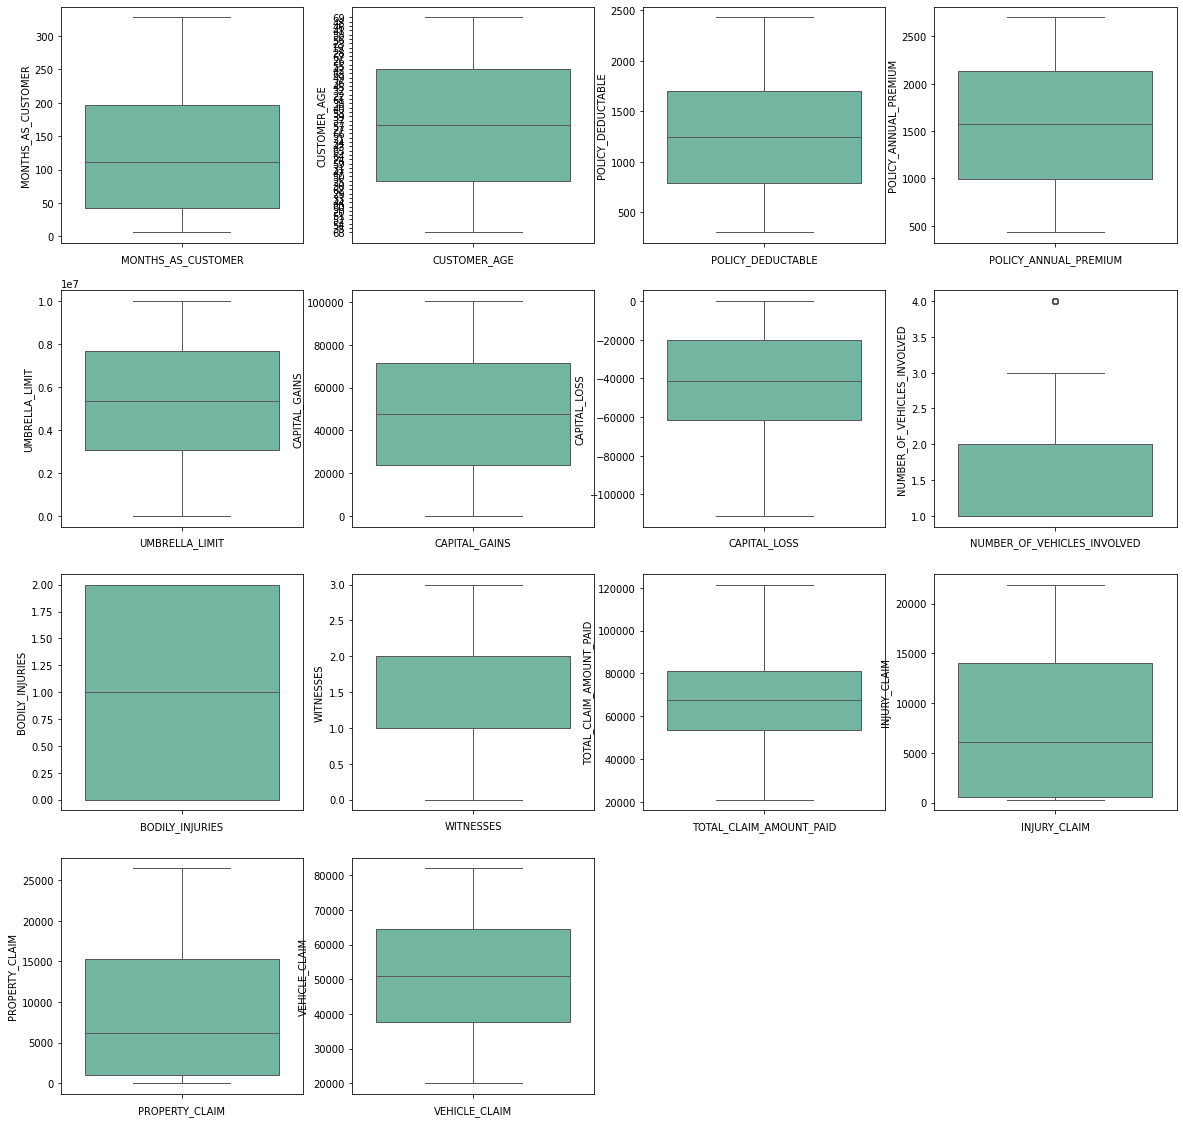

In [32]:
plt.figure(figsize=[20,20])


num_col= ['MONTHS_AS_CUSTOMER','CUSTOMER_AGE','POLICY_DEDUCTABLE','POLICY_ANNUAL_PREMIUM','UMBRELLA_LIMIT','CAPITAL_GAINS','CAPITAL_LOSS','NUMBER_OF_VEHICLES_INVOLVED','BODILY_INJURIES','WITNESSES',
 'TOTAL_CLAIM_AMOUNT_PAID','INJURY_CLAIM', 'PROPERTY_CLAIM', 'VEHICLE_CLAIM']

c=1

for i in num_col:
    plt.subplot(4, 4, c)
    plt.xlabel(i)
    sns.boxplot(insurance_claim[i] , palette="Set2")
    c = c + 1
    
plt.show()


In [33]:
insurance_claim['POLICE_REPORT_AVAILABLE'].value_counts(normalize=True,dropna=False)

POLICE_REPORT_AVAILABLE
Property Damage          0.563571
No Property Damage       0.378383
Details not Available    0.058045
Name: proportion, dtype: float64